<a href="https://colab.research.google.com/github/Nithya-15/Predictive-Analytics/blob/main/Predictive_Analytics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preprocessing

In [3]:
#Reading the file
df = pd.read_csv("Unemployment in America Per US State.csv")
df.head(5)

,FIPS Code,State/Area,Year,Month,Total Civilian Non-Institutional Population in State/Area,Total Civilian Labor Force in State/Area,Percent (%) of State/Area's Population,Total Employment in State/Area,Percent (%) of Labor Force Employed in State/Area,Total Unemployment in State/Area,Percent (%) of Labor Force Unemployed in State/Area
0,1,Alabama,1976,1,"2,605,000","1,484,555",57.0,"1,386,023",53.2,"98,532",6.6
1,2,Alaska,1976,1,"232,000","160,183",69.0,"148,820",64.1,"11,363",7.1
2,4,Arizona,1976,1,"1,621,000","964,120",59.5,"865,871",53.4,"98,249",10.2
3,5,Arkansas,1976,1,"1,536,000","889,044",57.9,"824,395",53.7,"64,649",7.3
4,6,California,1976,1,"15,621,000","9,774,280",62.6,"8,875,685",56.8,"898,595",9.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29892 entries, 0 to 29891
Data columns (total 11 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   FIPS Code                                                  29892 non-null  int64  
 1   State/Area                                                 29892 non-null  object 
 2   Year                                                       29892 non-null  int64  
 3   Month                                                      29892 non-null  int64  
 4   Total Civilian Non-Institutional Population in State/Area  29892 non-null  object 
 5   Total Civilian Labor Force in State/Area                   29892 non-null  object 
 6   Percent (%) of State/Area's Population                     29892 non-null  float64
 7   Total Employment in State/Area                             29892 non-null  object 
 8   Percen

# Checking Null Values

In [5]:
null_values_total = df.isnull().sum()

print("Null values in the entire DataFrame:")
print(null_values_total)

Null values in the entire DataFrame:
FIPS Code                                                    0
State/Area                                                   0
Year                                                         0
Month                                                        0
Total Civilian Non-Institutional Population in State/Area    0
Total Civilian Labor Force in State/Area                     0
Percent (%) of State/Area's Population                       0
Total Employment in State/Area                               0
Percent (%) of Labor Force Employed in State/Area            0
Total Unemployment in State/Area                             0
Percent (%) of Labor Force Unemployed in State/Area          0
dtype: int64


# Data Transformation

In [6]:
def objToInt(col):
    if df.dtypes[i]!='int64' and df.dtypes[i]!='float64':
        df[col]=df[col].str.replace(',','').astype(int)

In [7]:
columns = df.columns
for i in range(2,len(columns)):
    objToInt(columns[i])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29892 entries, 0 to 29891
Data columns (total 11 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   FIPS Code                                                  29892 non-null  int64  
 1   State/Area                                                 29892 non-null  object 
 2   Year                                                       29892 non-null  int64  
 3   Month                                                      29892 non-null  int64  
 4   Total Civilian Non-Institutional Population in State/Area  29892 non-null  int64  
 5   Total Civilian Labor Force in State/Area                   29892 non-null  int64  
 6   Percent (%) of State/Area's Population                     29892 non-null  float64
 7   Total Employment in State/Area                             29892 non-null  int64  
 8   Percen

In [9]:
import pandas as pd

# Data Transformation ; Summing the population of all the sates in US for the given year and month
grouped_df = df.groupby(['Year', 'Month']).agg({
    'Total Civilian Non-Institutional Population in State/Area': 'sum',
    'Total Civilian Labor Force in State/Area': 'sum',
    'Total Employment in State/Area': 'sum',
    'Total Unemployment in State/Area': 'sum'
}).reset_index()

# Print the new dataframe
display(grouped_df)


,Year,Month,Total Civilian Non-Institutional Population in State/Area,Total Civilian Labor Force in State/Area,Total Employment in State/Area,Total Unemployment in State/Area
0,1976,1,165430000,101836208,93748772,8087436
1,1976,2,165694000,101798481,93714001,8084480
2,1976,3,165945000,101808529,93748383,8060146
3,1976,4,166200000,101966712,93963034,8003678
4,1976,5,166461000,102203702,94252804,7950898
...,...,...,...,...,...,...
559,2022,8,279648100,173862408,167639450,6222958
560,2022,9,279850370,173888894,167475709,6413185
561,2022,10,280052513,173977488,167438599,6538889
562,2022,11,280226380,174017691,167505477,6512214


In [10]:
# Calculate percentages
grouped_df['Percent (%) of State/Area Population'] = (grouped_df['Total Civilian Labor Force in State/Area'] / grouped_df['Total Civilian Non-Institutional Population in State/Area']) * 100
grouped_df['Percent (%) of Labor Force Employed'] = (grouped_df['Total Employment in State/Area'] / grouped_df['Total Civilian Non-Institutional Population in State/Area']) * 100
grouped_df['Percent (%) of Labor Force Unemployed'] = (grouped_df['Total Unemployment in State/Area'] / grouped_df['Total Civilian Labor Force in State/Area']) * 100
grouped_df = grouped_df.round(2)
# Print the updated dataframe
display(grouped_df)


,Year,Month,Total Civilian Non-Institutional Population in State/Area,Total Civilian Labor Force in State/Area,Total Employment in State/Area,Total Unemployment in State/Area,Percent (%) of State/Area Population,Percent (%) of Labor Force Employed,Percent (%) of Labor Force Unemployed
0,1976,1,165430000,101836208,93748772,8087436,61.56,56.67,7.94
1,1976,2,165694000,101798481,93714001,8084480,61.44,56.56,7.94
2,1976,3,165945000,101808529,93748383,8060146,61.35,56.49,7.92
3,1976,4,166200000,101966712,93963034,8003678,61.35,56.54,7.85
4,1976,5,166461000,102203702,94252804,7950898,61.40,56.62,7.78
...,...,...,...,...,...,...,...,...,...
559,2022,8,279648100,173862408,167639450,6222958,62.17,59.95,3.58
560,2022,9,279850370,173888894,167475709,6413185,62.14,59.84,3.69
561,2022,10,280052513,173977488,167438599,6538889,62.12,59.79,3.76
562,2022,11,280226380,174017691,167505477,6512214,62.10,59.78,3.74


In [11]:
grouped_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 9 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Year                                                       564 non-null    int64  
 1   Month                                                      564 non-null    int64  
 2   Total Civilian Non-Institutional Population in State/Area  564 non-null    int64  
 3   Total Civilian Labor Force in State/Area                   564 non-null    int64  
 4   Total Employment in State/Area                             564 non-null    int64  
 5   Total Unemployment in State/Area                           564 non-null    int64  
 6   Percent (%) of State/Area Population                       564 non-null    float64
 7   Percent (%) of Labor Force Employed                        564 non-null    float64
 8   Percent (%)

In [12]:
# Create final_df by excluding the specified columns
final_df = grouped_df.drop(columns=[
    'Total Civilian Non-Institutional Population in State/Area',
    'Total Civilian Labor Force in State/Area',
    'Total Employment in State/Area',
    'Total Unemployment in State/Area'
])

# Print the final dataframe
display(final_df)


,Year,Month,Percent (%) of State/Area Population,Percent (%) of Labor Force Employed,Percent (%) of Labor Force Unemployed
0,1976,1,61.56,56.67,7.94
1,1976,2,61.44,56.56,7.94
2,1976,3,61.35,56.49,7.92
3,1976,4,61.35,56.54,7.85
4,1976,5,61.40,56.62,7.78
...,...,...,...,...,...
559,2022,8,62.17,59.95,3.58
560,2022,9,62.14,59.84,3.69
561,2022,10,62.12,59.79,3.76
562,2022,11,62.10,59.78,3.74


In [13]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 5 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Year                                   564 non-null    int64  
 1   Month                                  564 non-null    int64  
 2   Percent (%) of State/Area Population   564 non-null    float64
 3   Percent (%) of Labor Force Employed    564 non-null    float64
 4   Percent (%) of Labor Force Unemployed  564 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 22.2 KB


# Univariate Analysis

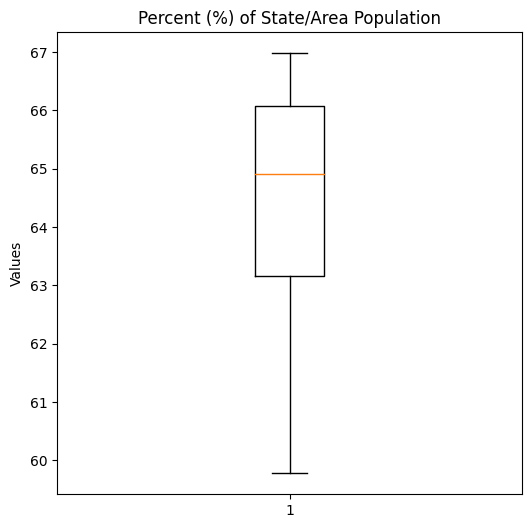

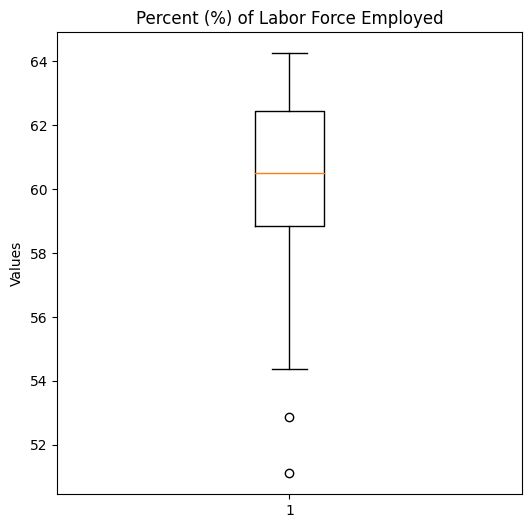

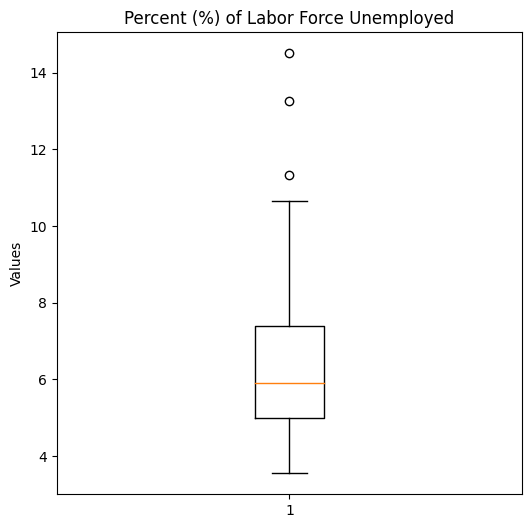

In [15]:
# Plotting the box plots for the three independent variables

columns = final_df.columns
for i in range(2,len(columns)):
    plt.figure(figsize=(6, 6))
    plt.boxplot(final_df[columns[i]])
    plt.title(columns[i])
    plt.ylabel('Values')
    plt.show()

### PDF plots for Employed and Unemployed columns

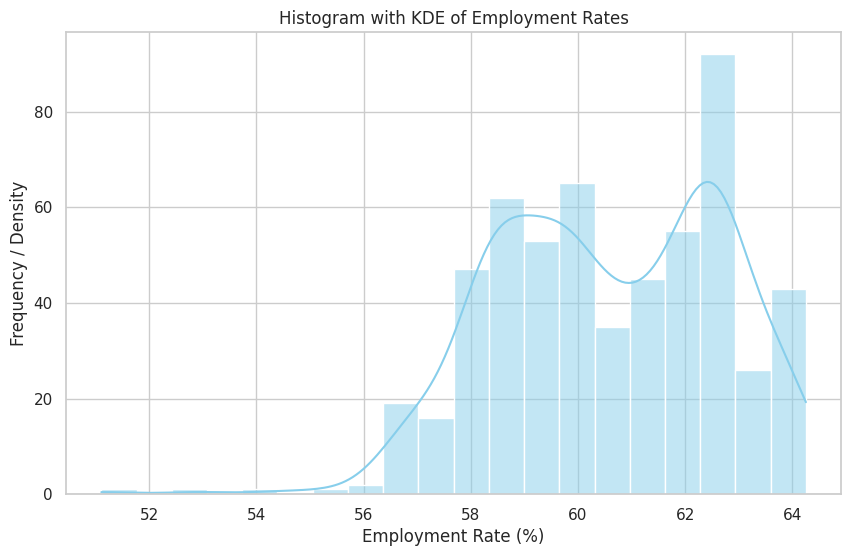

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot
sns.set(style="whitegrid")

# Create the histogram plot with KDE
plt.figure(figsize=(10, 6))
sns.histplot(data=final_df, x='Percent (%) of Labor Force Employed', bins=20, color='skyblue', kde=True)

plt.title('Histogram with KDE of Employment Rates')
plt.xlabel('Employment Rate (%)')
plt.ylabel('Frequency / Density')
plt.show()


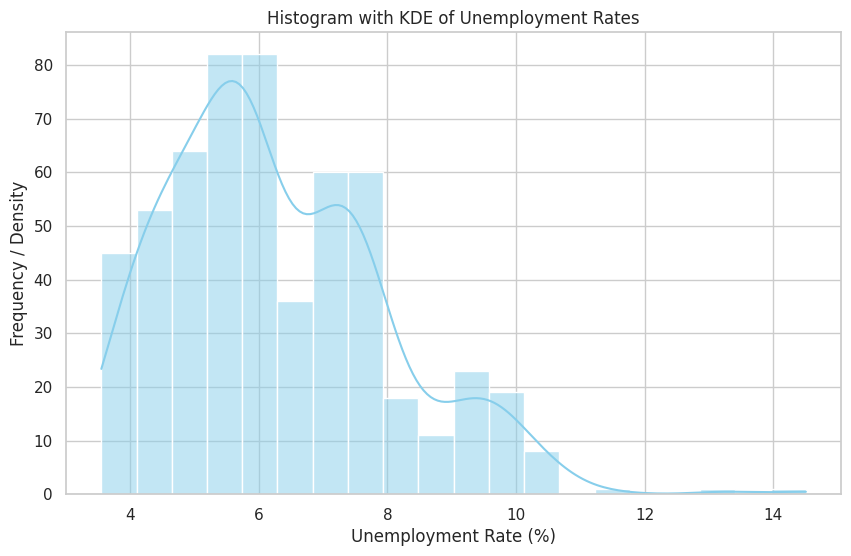

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of the plot
sns.set(style="whitegrid")

# Create the histogram plot with KDE
plt.figure(figsize=(10, 6))
sns.histplot(data=final_df, x='Percent (%) of Labor Force Unemployed', bins=20, color='skyblue', kde=True)

plt.title('Histogram with KDE of Unemployment Rates')
plt.xlabel('Unemployment Rate (%)')
plt.ylabel('Frequency / Density')
plt.show()

# Bivariate Analysis

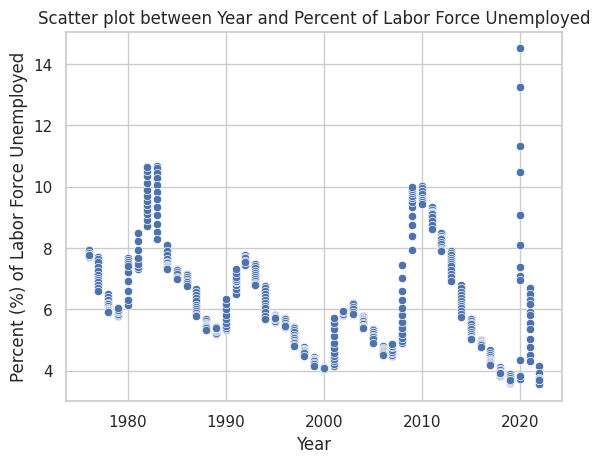

In [20]:
# Create a new DataFrame with the two desired columns
new_df = final_df[['Year', 'Percent (%) of Labor Force Unemployed']]

# Generate a scatter plot using Seaborn
sns.scatterplot(x='Year', y='Percent (%) of Labor Force Unemployed', data=new_df)

# Add a title and grid
plt.title('Scatter plot between Year and Percent of Labor Force Unemployed')
plt.grid(True)

# Show the plot
plt.show()

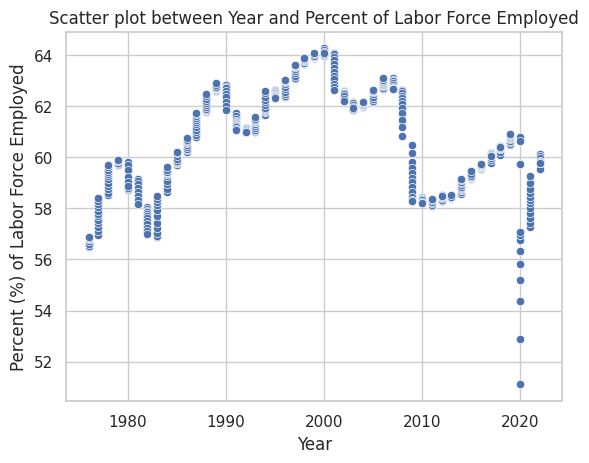

In [21]:
# Create a new DataFrame with the two desired columns
new_df = final_df[['Year', 'Percent (%) of Labor Force Employed']]

# Generate a scatter plot using Seaborn
sns.scatterplot(x='Year', y='Percent (%) of Labor Force Employed', data=new_df)

# Add a title and grid
plt.title('Scatter plot between Year and Percent of Labor Force Employed')
plt.grid(True)

# Show the plot
plt.show()

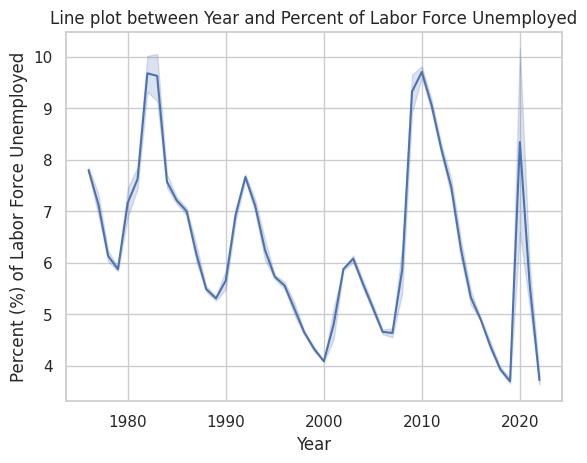

In [22]:
# Plot a line graph between Year and Percent of Labor Force Unemployed
import seaborn as sns
import pandas as pd
sns.lineplot(x='Year', y='Percent (%) of Labor Force Unemployed', data=final_df)  # Using seaborn syntax
plt.title('Line plot between Year and Percent of Labor Force Unemployed')
plt.grid(True)
plt.show()


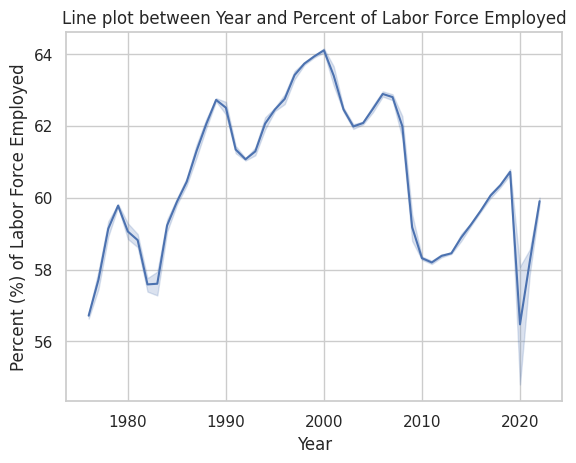

In [23]:
# Plot a line graph between Year and Percent of Labor Force Unemployed
sns.lineplot(x='Year', y='Percent (%) of Labor Force Employed', data=final_df)  # Using seaborn syntax
plt.title('Line plot between Year and Percent of Labor Force Employed')
plt.grid(True)
plt.show()


### Identifying top 10 states with highest unemployment rate


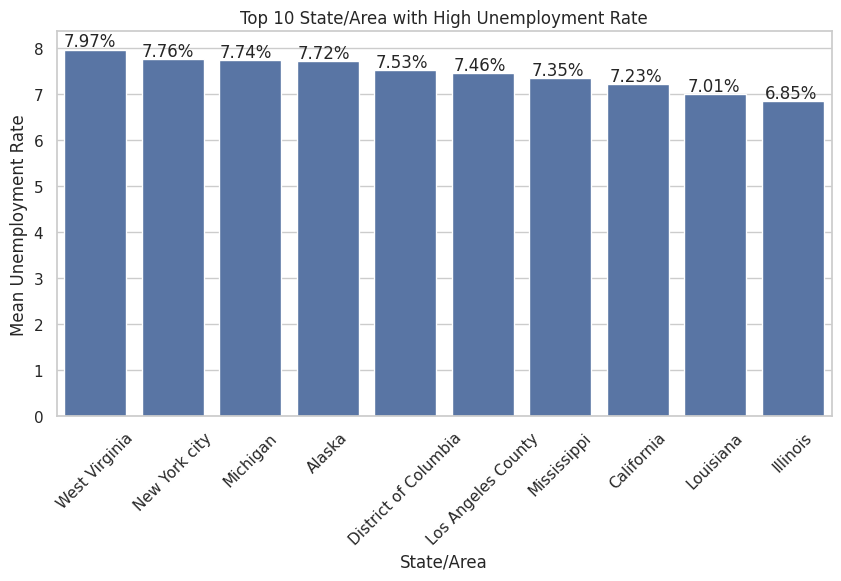

In [24]:
Unemployment_by_state = df.groupby('State/Area')['Percent (%) of Labor Force Unemployed in State/Area'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
ax = sns.barplot(x = Unemployment_by_state.index, y = Unemployment_by_state.values)
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2))+'%', (p.get_x() * 1.005, p.get_height() * 1.009))
ax.set_title('Top 10 State/Area with High Unemployment Rate')
ax.set_ylabel('Mean Unemployment Rate')
plt.show()

### Identifying 5 states with least unemployment rate

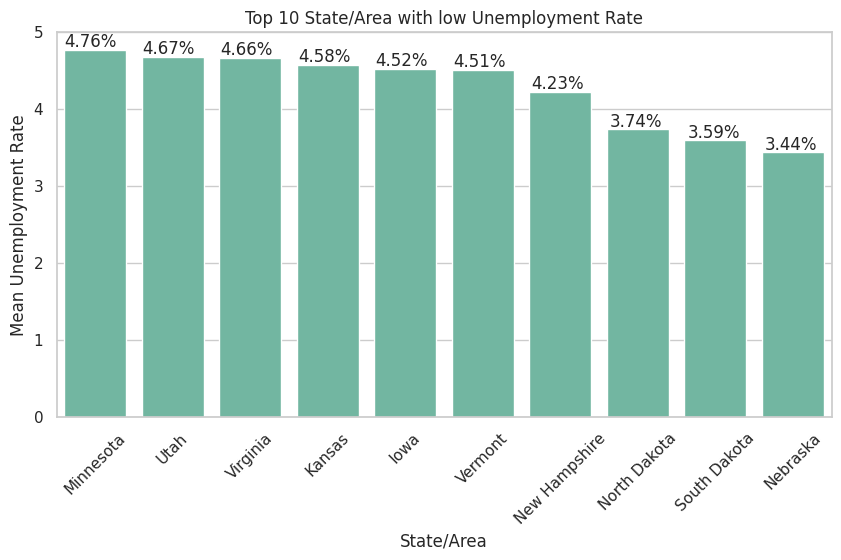

In [25]:
Unemployment_by_state = df.groupby('State/Area')['Percent (%) of Labor Force Unemployed in State/Area'].mean().sort_values(ascending=False).tail(10)
sns.set_palette('Set2')
plt.figure(figsize=(10,5))
ax = sns.barplot(x = Unemployment_by_state.index, y = Unemployment_by_state.values)
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2))+'%', (p.get_x() * 1.005, p.get_height() * 1.009))
ax.set_title('Top 10 State/Area with low Unemployment Rate')
ax.set_ylabel('Mean Unemployment Rate')
plt.show()

### Identifying top 10 states with highest percentage of labour force

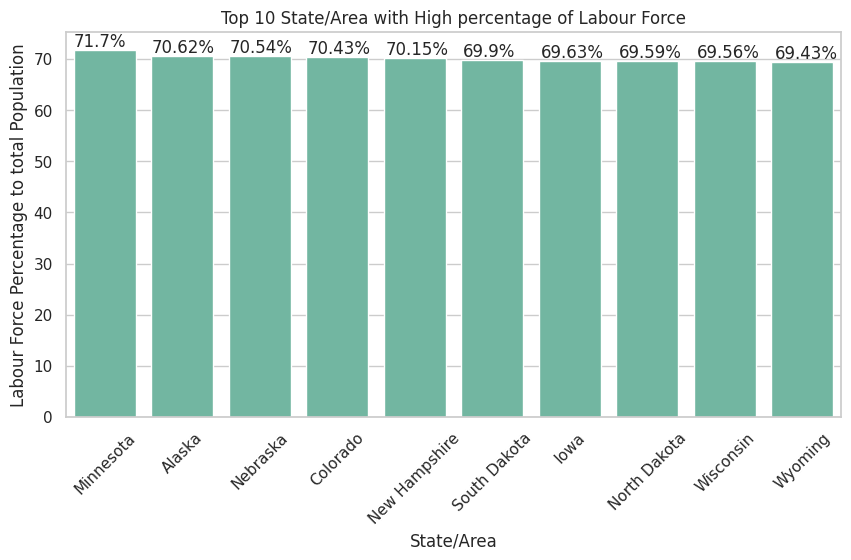

In [26]:
Unemployment_by_state = df.groupby('State/Area')["Percent (%) of State/Area's Population"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
ax = sns.barplot(x = Unemployment_by_state.index, y = Unemployment_by_state.values)
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)) + '%', (p.get_x() * 1.005, p.get_height() * 1.009))
ax.set_title('Top 10 State/Area with High percentage of Labour Force')
ax.set_ylabel('Labour Force Percentage to total Population')
plt.show()

### Identifying 10 states with least labour force

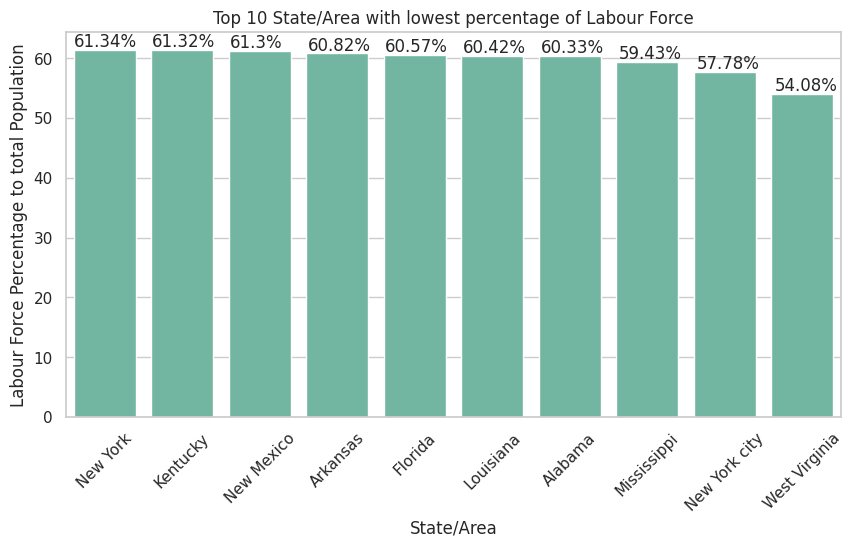

In [27]:
Uneployment_by_state = df.groupby('State/Area')["Percent (%) of State/Area's Population"].mean().sort_values(ascending=False).tail(10)
plt.figure(figsize=(10,5))
ax = sns.barplot(x = Uneployment_by_state.index, y = Uneployment_by_state.values)
plt.xticks(rotation=45)
for p in ax.patches:
    ax.annotate(str(round(p.get_height(),2)) + '%', (p.get_x() * 1.005, p.get_height() * 1.009))
ax.set_title('Top 10 State/Area with lowest percentage of Labour Force')
ax.set_ylabel('Labour Force Percentage to total Population')
plt.show()

# Outlier Removal

In [28]:
# Checking the percentage of Outliers and removing them

# Specify the column containing unemployment data
unemployment_column = 'Percent (%) of Labor Force Unemployed'

# Calculate the threshold for identifying outliers (e.g., using IQR)
Q1 = final_df[unemployment_column].quantile(0.25)
Q3 = final_df[unemployment_column].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers in the unemployment column
outliers = final_df[(final_df[unemployment_column] < lower_bound) | (final_df[unemployment_column] > upper_bound)]

# Calculate the percentage of outliers
percentage_outliers = (len(outliers) / len(final_df)) * 100

print("Percentage of outliers in the unemployment column:", percentage_outliers)


Percentage of outliers in the unemployment column: 0.5319148936170213


In [29]:
# Remove Outlier data

import pandas as pd

# Assuming df is your DataFrame containing the unemployment data

# Define a function to remove outliers based on the IQR method
def remove_outliers_iqr(final_df, column):
    Q1 = final_df[column].quantile(0.25)
    Q3 = final_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return final_df[(final_df[column] >= lower_bound) & (final_df[column] <= upper_bound)]

# Remove outliers from the 'Percent (%) of Labor Force Unemployed in State/Area' column
df = remove_outliers_iqr(final_df, 'Percent (%) of Labor Force Unemployed')
df = remove_outliers_iqr(final_df, 'Percent (%) of Labor Force Employed')
# Display the cleaned DataFrame without outliers
print(df)

     Year  Month  Percent (%) of State/Area Population  \
0    1976      1                                 61.56   
1    1976      2                                 61.44   
2    1976      3                                 61.35   
3    1976      4                                 61.35   
4    1976      5                                 61.40   
..    ...    ...                                   ...   
559  2022      8                                 62.17   
560  2022      9                                 62.14   
561  2022     10                                 62.12   
562  2022     11                                 62.10   
563  2022     12                                 62.07   

     Percent (%) of Labor Force Employed  \
0                                  56.67   
1                                  56.56   
2                                  56.49   
3                                  56.54   
4                                  56.62   
..                                   ..

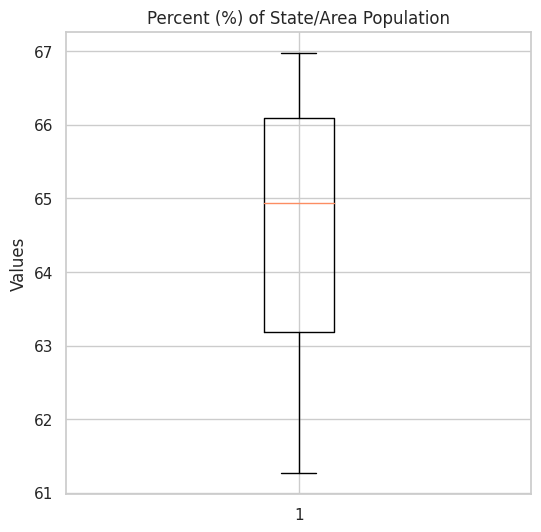

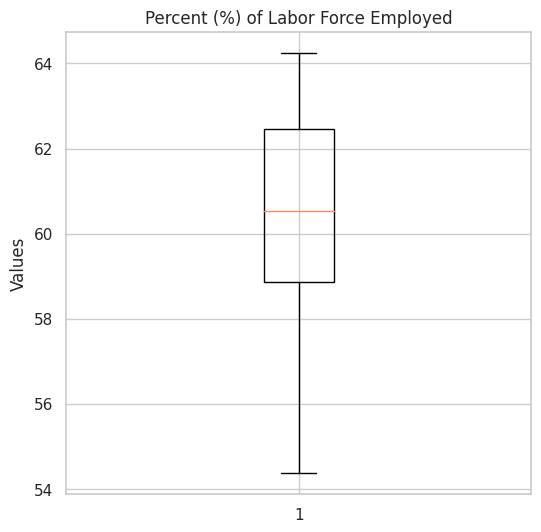

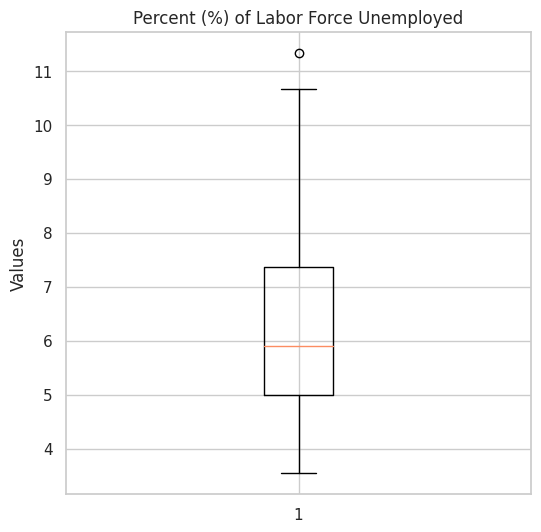

In [30]:
columns = df.columns
for i in range(2,len(columns)):
    plt.figure(figsize=(6, 6))
    plt.boxplot(df[columns[i]])
    plt.title(columns[i])
    plt.ylabel('Values')
    plt.show()

### Time Series Analysis

### Checking Stationarity

In [31]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(final_df['Percent (%) of Labor Force Unemployed'])

# Extract and print the p-value
p_value = result[1]
print("ADF Test p-value:", p_value)



# Check if the p-value is less than a significance level (e.g., 0.05)
if p_value < 0.05:
    print("The data is likely stationary.")
else:
    print("The data is likely non-stationary.")


ADF Test p-value: 0.01510041660984182
The data is likely stationary.


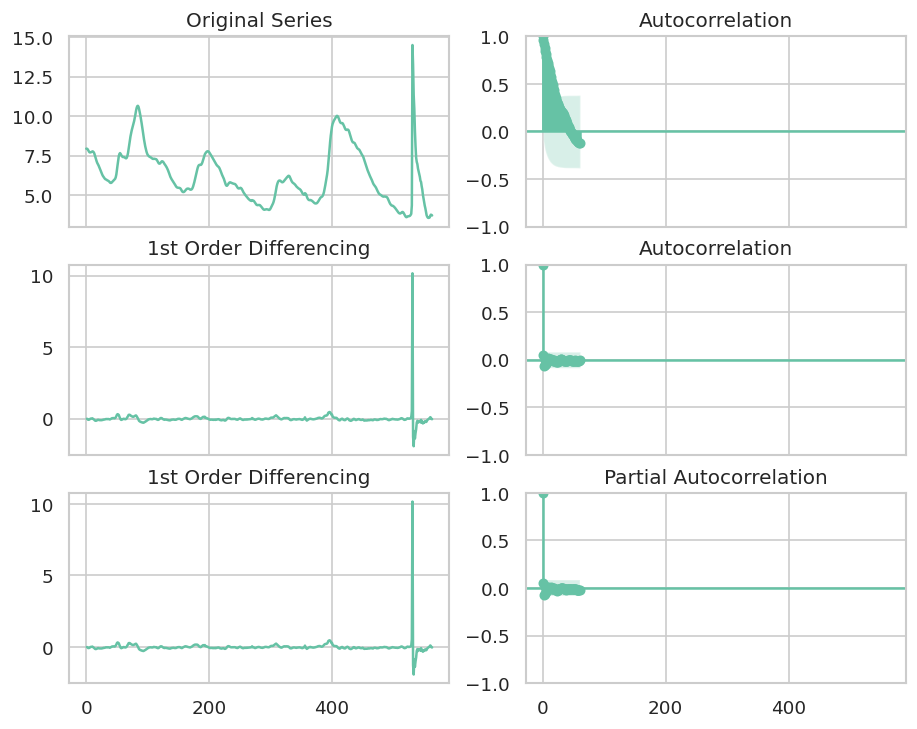

In [32]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})


# Original Series
fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(final_df['Percent (%) of Labor Force Unemployed']); axes[0, 0].set_title('Original Series')
plot_acf(final_df['Percent (%) of Labor Force Unemployed'], ax=axes[0, 1], lags=60, alpha=0.05)

# 1st Differencing
axes[1, 0].plot(final_df['Percent (%) of Labor Force Unemployed'].diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(final_df['Percent (%) of Labor Force Unemployed'].diff().dropna(), ax=axes[1, 1], lags=60, alpha=0.05)

axes[2, 0].plot(final_df['Percent (%) of Labor Force Unemployed'].diff()); axes[2, 0].set_title('1st Order Differencing')
plot_pacf(final_df['Percent (%) of Labor Force Unemployed'].diff().dropna(), ax=axes[2, 1], lags=60, alpha=0.05)


plt.show()

### Plotting ACF and PACF plots

<Figure size 1440x720 with 0 Axes>

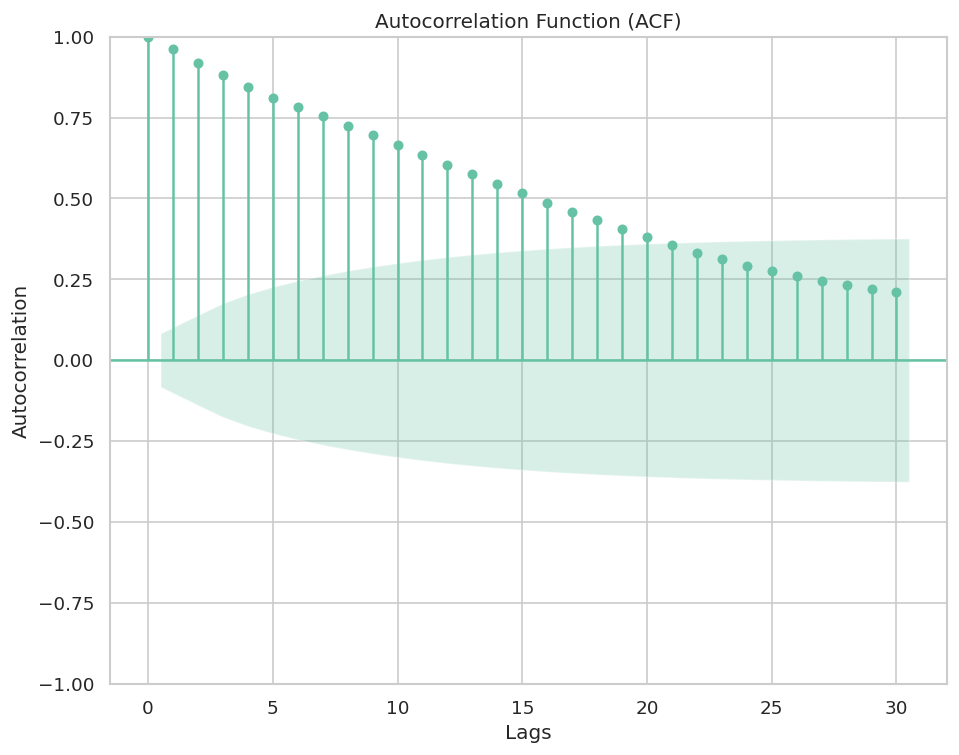

<Figure size 1440x720 with 0 Axes>

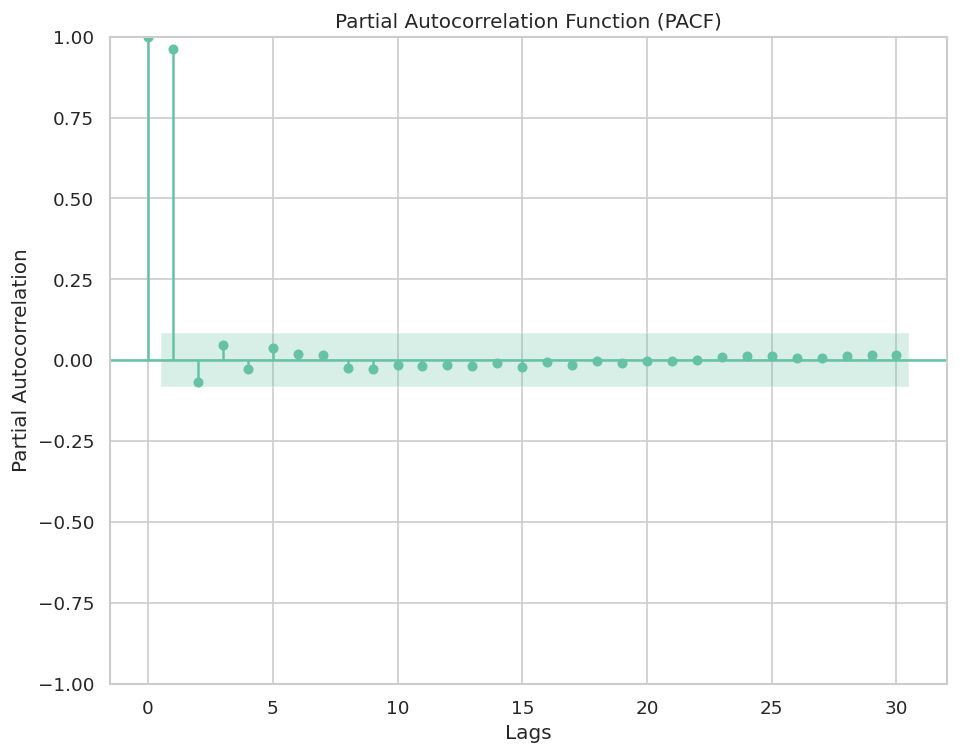

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot ACF
plt.figure(figsize=(12, 6))
plot_acf(final_df['Percent (%) of Labor Force Unemployed'], lags=30, alpha=0.05)
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.show()

# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(final_df['Percent (%) of Labor Force Unemployed'], lags=30, alpha=0.05)
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.show()


##Using ARIMA(1, 0, 0) Model

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


dta = df['Percent (%) of Labor Force Unemployed']

# Creating a datetime index with monthly frequency
dta.index = pd.date_range(start='1976-01', end='2022-11', freq='M')

# Splitting data into train and test sets with 80:20 ratio
train, test = train_test_split(dta, test_size=0.2, shuffle=False)

# Fitting ARIMA(1,0,1) model
model = ARIMA(train, order=(1, 0, 0))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

                                         SARIMAX Results                                         
Dep. Variable:     Percent (%) of Labor Force Unemployed   No. Observations:                  449
Model:                                    ARIMA(1, 0, 0)   Log Likelihood                 372.287
Date:                                   Fri, 19 Apr 2024   AIC                           -738.573
Time:                                           02:29:32   BIC                           -726.252
Sample:                                       01-31-1976   HQIC                          -733.717
                                            - 05-31-2013                                         
Covariance Type:                                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3264      1.979      3.702      0.000    

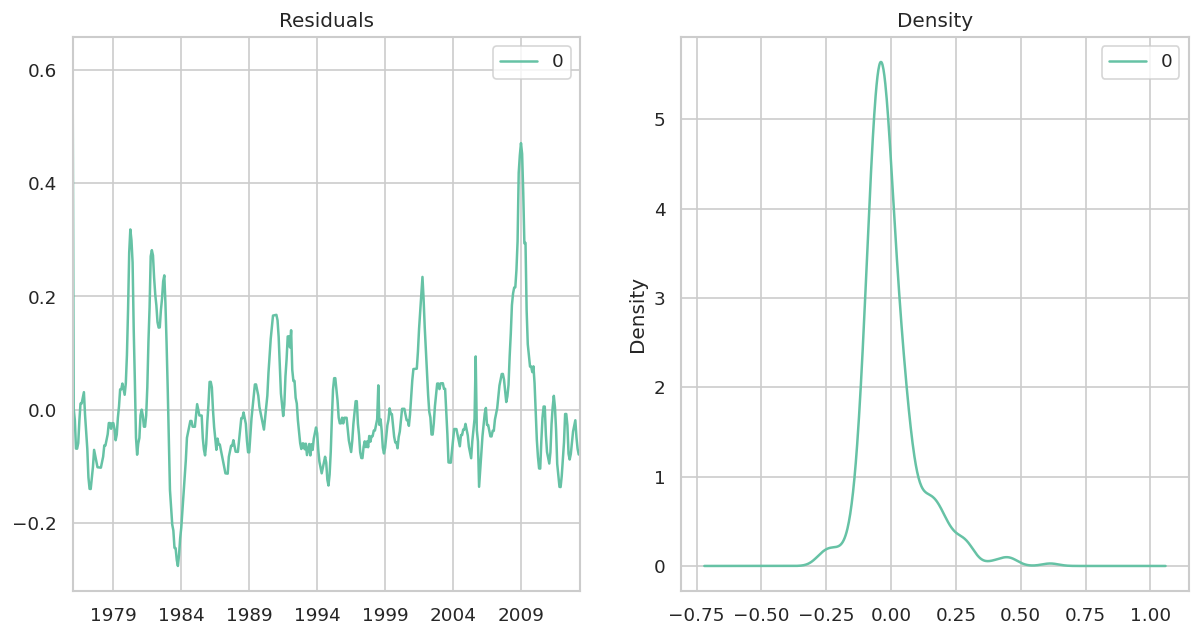

In [36]:
# Plotting residuals
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [37]:
# Forecasting
forecast_steps = len(test)  # Forecasting for the length of the test set
forecast = model_fit.forecast(steps=forecast_steps)

# Calculating and printing Mean Squared Error (MSE)
mse = mean_squared_error(test, forecast)
print("Mean Squared Error:", mse)
from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test, forecast)
print("Mean Absolute Error:", mae)

Mean Squared Error: 8.218340283959298
Mean Absolute Error: 2.6261431122552192


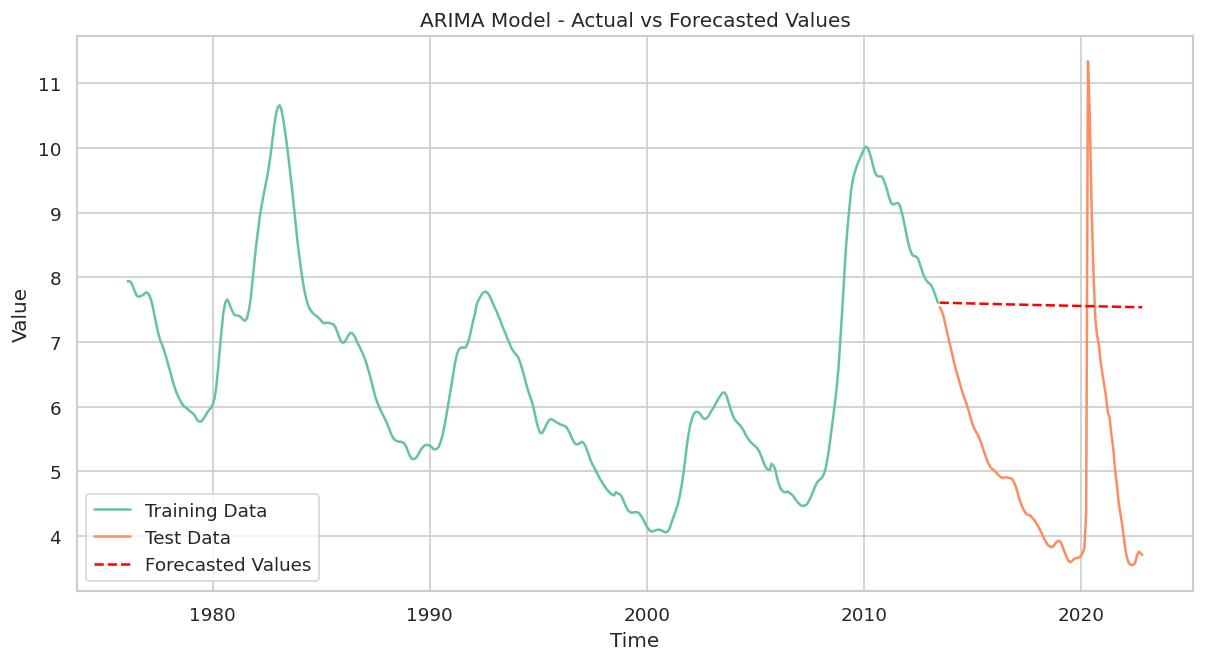

In [38]:
# Plotting actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(test.index, forecast, color='red', linestyle='--', label='Forecasted Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('ARIMA Model - Actual vs Forecasted Values')
plt.legend()
plt.show()

##Using ARIMA(1, 1, 0) Model

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


dta = df['Percent (%) of Labor Force Unemployed']

# Creating a datetime index with monthly frequency
dta.index = pd.date_range(start='1976-01', end='2022-11', freq='M')

# Splitting data into train and test sets with 80:20 ratio
train, test = train_test_split(dta, test_size=0.2, shuffle=False)

# Fitting ARIMA(1,0,1) model
model = ARIMA(train, order=(1, 1, 0))
model_fit = model.fit()

# Print model summary
print(model_fit.summary())

                                         SARIMAX Results                                         
Dep. Variable:     Percent (%) of Labor Force Unemployed   No. Observations:                  449
Model:                                    ARIMA(1, 1, 0)   Log Likelihood                 940.084
Date:                                   Fri, 19 Apr 2024   AIC                          -1876.167
Time:                                           02:29:46   BIC                          -1867.957
Sample:                                       01-31-1976   HQIC                         -1872.931
                                            - 05-31-2013                                         
Covariance Type:                                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9602      0.009    106.342      0.000    

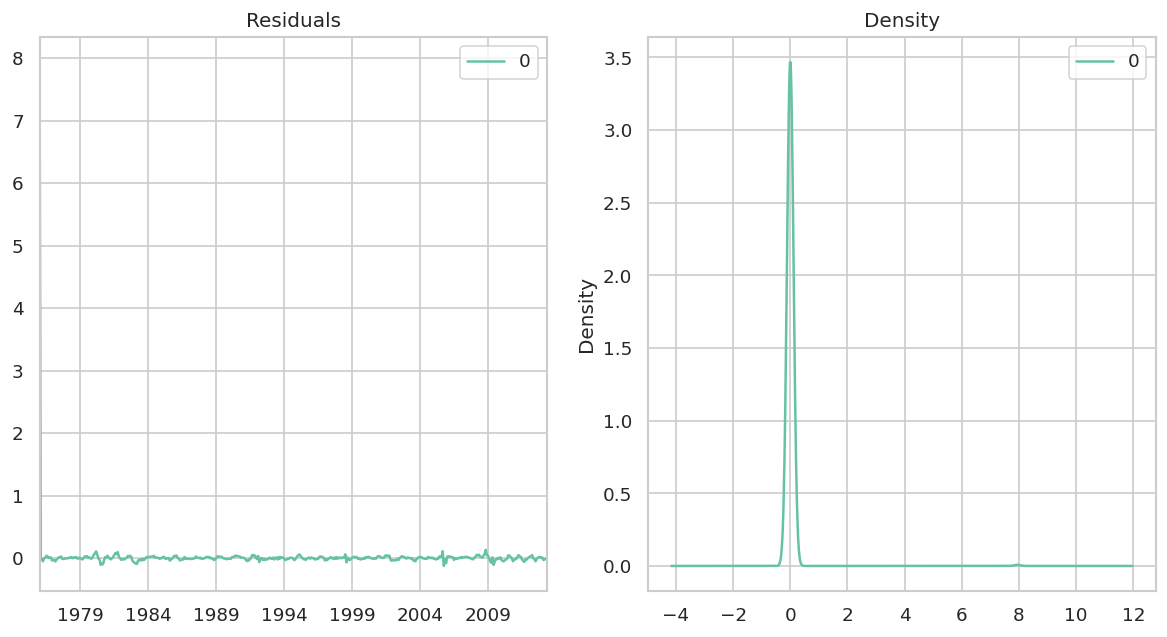

In [40]:
# Plotting residuals
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

In [41]:
# Forecasting
forecast_steps = len(test)  # Forecasting for the length of the test set
forecast = model_fit.forecast(steps=forecast_steps)

# Calculating and printing Mean Squared Error (MSE)
mse = mean_squared_error(test, forecast)
print("Mean Squared Error:", mse)

from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test, forecast)
print("Mean Absolute Error:", mae)

Mean Squared Error: 2.668095970413558
Mean Absolute Error: 1.400223997859567


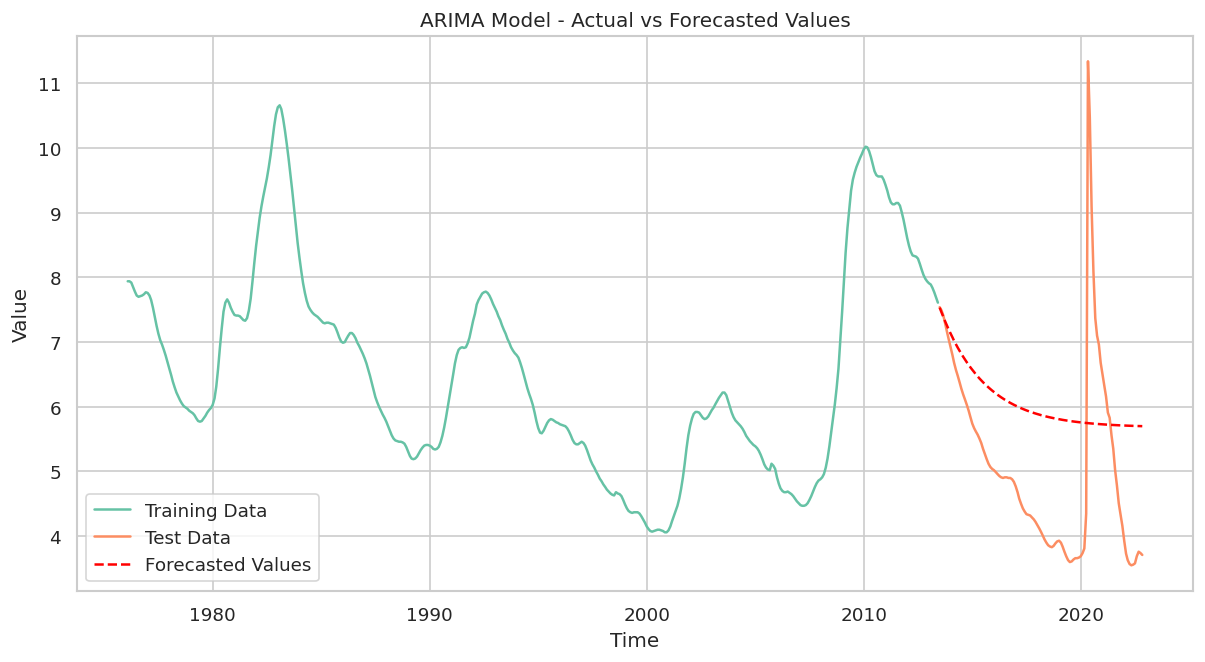

In [42]:
# Plotting actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(train.index, train, label='Training Data')
plt.plot(test.index, test, label='Test Data')
plt.plot(test.index, forecast, color='red', linestyle='--', label='Forecasted Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('ARIMA Model - Actual vs Forecasted Values')
plt.legend()
plt.show()

In [43]:
import pandas as pd

results = pd.DataFrame({'Actual': test.values, 'Predicted': forecast}, index=test.index)
print(results)


            Actual  Predicted
2013-06-30    7.54   7.533186
2013-07-31    7.49   7.459430
2013-08-31    7.41   7.388612
2013-09-30    7.29   7.320614
2013-10-31    7.16   7.255324
...            ...        ...
2022-06-30    3.58   5.704058
2022-07-31    3.69   5.703142
2022-08-31    3.76   5.702263
2022-09-30    3.74   5.701419
2022-10-31    3.71   5.700608

[113 rows x 2 columns]


## LSTM Model


Epoch 1/100
14/14 [==============================] - 6s 93ms/step - loss: 27.2389 - val_loss: 3.6934
Epoch 2/100
14/14 [==============================] - 0s 19ms/step - loss: 4.7926 - val_loss: 4.4831
Epoch 3/100
14/14 [==============================] - 0s 17ms/step - loss: 2.7024 - val_loss: 5.6162
Epoch 4/100
14/14 [==============================] - 0s 18ms/step - loss: 2.4984 - val_loss: 3.8451
Epoch 5/100
14/14 [==============================] - 0s 18ms/step - loss: 2.4431 - val_loss: 3.5157
Epoch 6/100
14/14 [==============================] - 0s 19ms/step - loss: 2.3349 - val_loss: 3.9139
Epoch 7/100
14/14 [==============================] - 0s 17ms/step - loss: 2.1920 - val_loss: 3.3268
Epoch 8/100
14/14 [==============================] - 0s 19ms/step - loss: 1.9210 - val_loss: 2.7774
Epoch 9/100
14/14 [==============================] - 0s 19ms/step - loss: 1.3424 - val_loss: 1.9387
Epoch 10/100
14/14 [==============================] - 0s 20ms/step - loss: 0.7457 - val_loss: 1.567

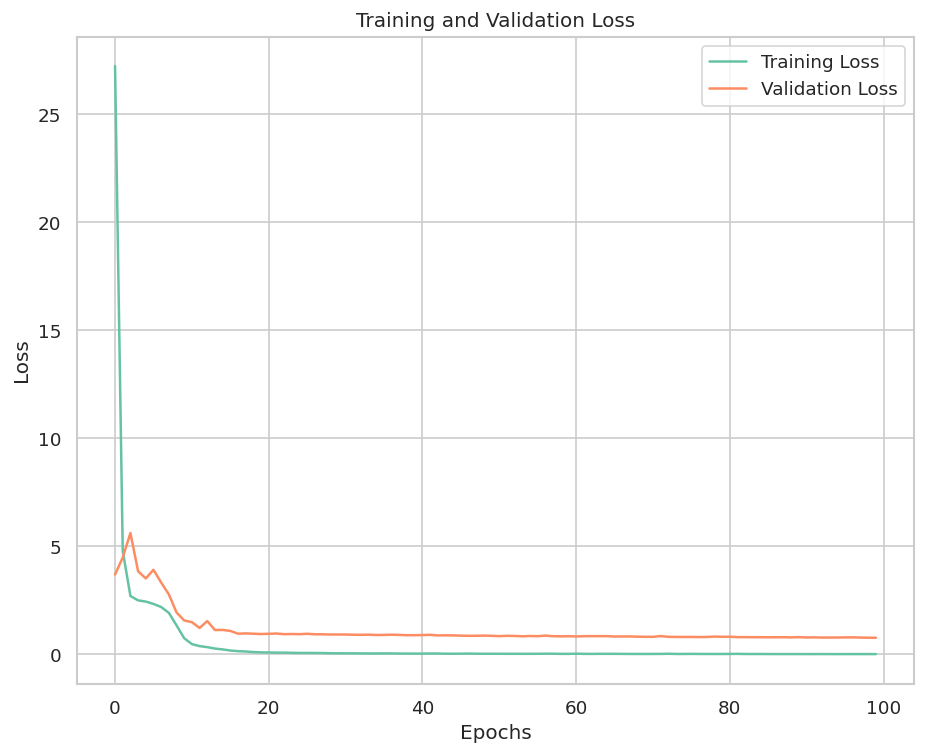

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import random
# Set random seed for NumPy
np.random.seed(15)

# Set random seed for Python's built-in random number generator
random.seed(15)


# Assuming 'df' contains your time series data
dta = df['Percent (%) of Labor Force Unemployed']

dta_index = pd.to_datetime(dta.index)

# Define the sequence length
sequence_length = 12
# Function to create sequences from time series data
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

# Create sequences for training data
X, y = create_sequences(dta.values, sequence_length)
X_train_size = int(len(dta) * 0.8)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, shuffle=False)

# Reshape input data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_val = np.reshape(X_val, (X_val.shape[0], X_val.shape[1], 1))

# Define the LSTM model architecture
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                    validation_data=(X_val, y_val), callbacks=[early_stopping])

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


4/4 [==============================] - 2s 13ms/step
Mean Squared Error: 0.7676440694764088


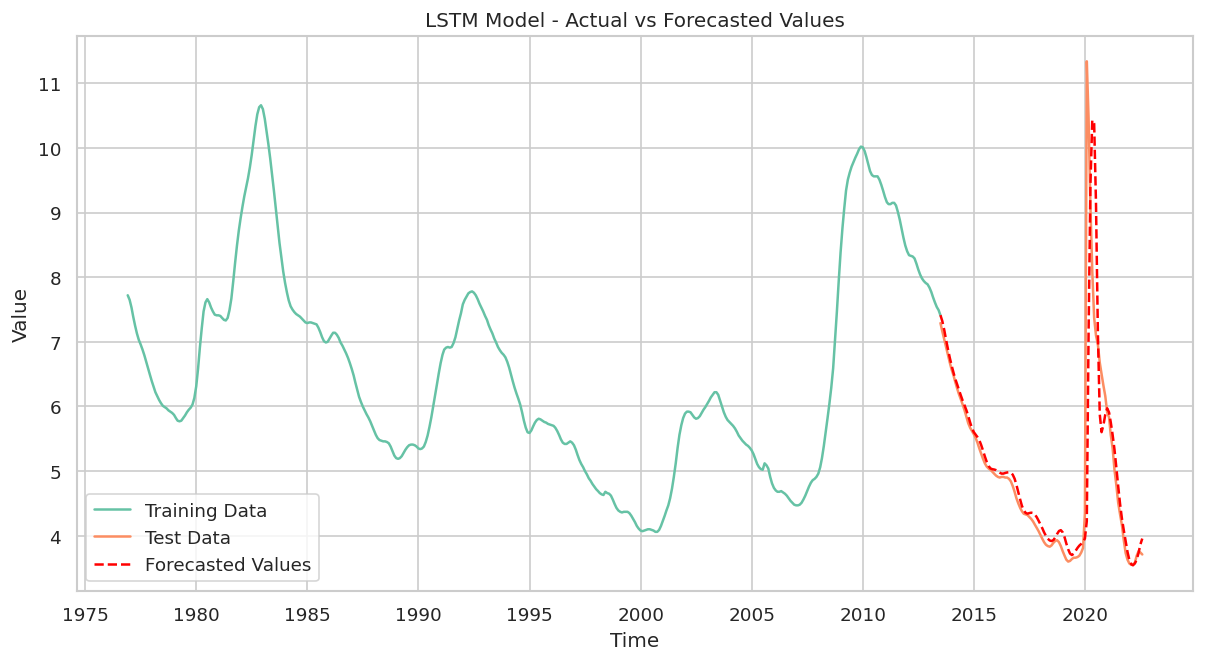

In [45]:
# Forecasting
forecast = model.predict(X_val)

# Calculating and printing Mean Squared Error (MSE)
mse = mean_squared_error(y_val, forecast)
print("Mean Squared Error:", mse)
from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Error (MAE)
# mae = mean_absolute_error(test, forecast)
# print("Mean Absolute Error:", mae)

# Plotting actual vs forecasted values
plt.figure(figsize=(12, 6))
plt.plot(dta_index[sequence_length-2:X_train_size+1], y_train, label='Training Data')
plt.plot(dta_index[X_train_size:X_train_size+len(y_val)], y_val, label='Test Data')
plt.plot(dta_index[X_train_size:X_train_size+len(forecast)], forecast, color='red', linestyle='--', label='Forecasted Values')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('LSTM Model - Actual vs Forecasted Values')
plt.legend()
plt.show()

In [46]:
from sklearn.metrics import mean_absolute_error

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_val, forecast)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 0.29486473733728574


In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 12, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 30651 (119.73 KB)
Trainable params: 30651 (119.73 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
# Define the number of future time steps to predict
num_future_steps = 20  # Adjust based on how many future values you want to predict

# Create sequences for future prediction
future_sequences = dta.values[-sequence_length:].reshape(1, sequence_length, 1)
future_forecast = []

# Generate future date index
future_dates = pd.date_range(start=dta_index[-1], periods=num_future_steps + 1, freq='M')[1:]

# Predict future values step by step
for i in range(num_future_steps):
    next_prediction = model.predict(future_sequences)[0][0]
    future_forecast.append(next_prediction)
    future_sequences = np.append(future_sequences[:, 1:, :], [[[next_prediction]]], axis=1)

# Create a DataFrame to display future predicted values with date index
future_predictions_df = pd.DataFrame({'Date': future_dates, 'Predicted Value': future_forecast})
print("Future Predicted Values:")
print(future_predictions_df)


1/1 [==============================] - 0s 22ms/step
Future Predicted Values:
         Date  Predicted Value
0  2022-11-30         3.979428
1  2022-12-31         4.070386
2  2023-01-31         4.198424
3  2023-02-28         4.347388
4  2023-03-31         4.511861
5  2023-04-30         4.691260
6  2023-05-31         4.883822
7  2023-06-30         5.086888
8  2023-07-31         5.299419
9  2023-08-31         5.518016
10 2023-09-30         5.745248
11 2023-10-31         5.983949
12 2023-11-30         6.233052
13 2023-12-31         6.480403
14 2024-01-31         6.731700
15 2024-02-29         6.981688
16 2024-03-31         7.226449
17 2024-04-30         7.462612
18 2024-05-31         7.687426
19 2024-06-30         7.899127
